In [80]:
from sympy import *
from sympy.solvers.ode.systems import dsolve_system
x, y = symbols("x y", cls=Function)
t = symbols("t")

k = symbols('k')

eqs = [
    Eq(x(t).diff(t).diff(t), 0.2*x(t) - 0.3*y(t) + 1), 
    Eq(y(t).diff(t).diff(t), -0.5*x(t) - y(t))
]
sol = dsolve_system(eqs, ics={x(0):0, y(0):0, x(t).diff(t).subs(t,0):0, y(t).diff(t).subs(t,0):0})
# sol = dsolve_system(eqs)

xeq = simplify(sol[0][0])
yeq = simplify(sol[0][1])
display(xeq, yeq)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sympy/simplify/radsimp.py:1131: SymPyDeprecationWarning: 

Using non-Expr arguments in Mul is deprecated (in this case, one of
the arguments has type 'Tuple').

If you really did intend to use a multiplication or addition operation with
this object, use the * or + operator instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#non-expr-args-deprecated
for details.

This has been deprecated since SymPy version 1.7. It
will be removed in a future version of SymPy.

  return Mul(*numer, evaluate=not exact), Mul(*denom, evaluate=not exact)


Eq(x(t), ((1.46443575930072 - 1.46443575930072*exp(0.560484471554998*t))*exp(-0.560484471554998*t)**1.0 + (1.46443575930072 - 1.46443575930072*exp(-0.560484471554998*t))*exp(0.560484471554998*t) + (0.0717286614585819*sin(1.05552965039088*t)**2 - 5.28117500187329e-18*sin(1.05552965039088*t) + 0.0717286614585819*cos(1.05552965039088*t)**2 - 0.0717286614585816*cos(1.05552965039088*t))*exp(-0.560484471554998*t)**1.0*exp(0.560484471554998*t))*exp(-0.560484471554998*t)/exp(-0.560484471554998*t)**1.0)

Eq(y(t), ((-0.557182869146858 + 0.557182869146859*exp(-0.560484471554998*t))*exp(0.560484471554998*t) + (0.557182869146859*exp(0.560484471554998*t) - 0.557182869146857)*exp(-0.560484471554998*t)**1.0 + (0.314205690277712*sin(1.05552965039088*t)**2 - 2.31340611019092e-17*sin(1.05552965039088*t) + 0.314205690277712*cos(1.05552965039088*t)**2 - 0.31420569027771*cos(1.05552965039088*t))*exp(-0.560484471554998*t)**1.0*exp(0.560484471554998*t))*exp(-0.560484471554998*t)/exp(-0.560484471554998*t)**1.0)

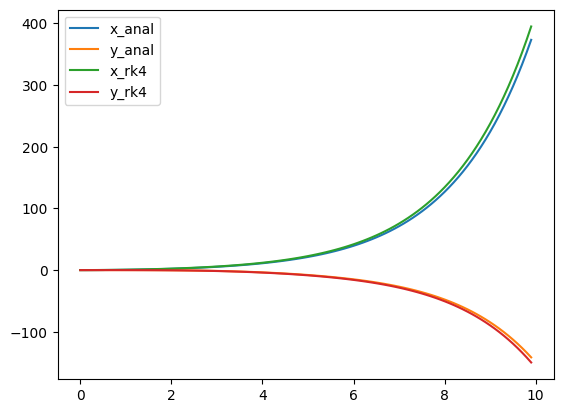

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def RK4(f, X, dt):
    # Runge-Kutta 4 integration
    k1 = f(X)
    k2 = f(X + (dt/2)*k1)
    k3 = f(X + (dt/2)*k2)
    k4 = f(X + dt*k3)
    return X + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

def f(X):
    x, xd, y, yd = X
    xdd = 0.2*x - 0.3*y + 1
    ydd = -0.5*x - y
    return np.array([xd, xdd, yd, ydd])

log = [[], [],[], [],[]] #t, x_anal,y_anal, x_rk4,y_rk4

dt = 0.1
X = np.zeros(4)
for ti in np.arange(0, 10, step=dt):
    x_anal = xeq.rhs.subs(t,ti).n()
    y_anal = yeq.rhs.subs(t,ti).n()

    X = RK4(f, X, dt)
    x_rk4, xd_rk4, y_rk4, yd_rk4 = X

    log[0].append(ti)
    log[1].append(x_anal)
    log[2].append(y_anal)
    log[3].append(x_rk4)
    log[4].append(y_rk4)

plt.close('all')
plt.figure()
plt.plot(log[0], log[1], label='x_anal')
plt.plot(log[0], log[2], label='y_anal')
plt.plot(log[0], log[3], label='x_rk4')
plt.plot(log[0], log[4], label='y_rk4')
plt.legend()
plt.show()


In [86]:



X0 = np.zeros(4)

x, log = RK4(f, X0, 0.1)
x


array([ 5.00083333e-03,  1.00033333e-01, -2.08333333e-06, -8.33333333e-05])